# Working algorithm

In [1]:
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix
from scipy.misc import logsumexp
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix
from scipy.misc import logsumexp

In [2]:
%matplotlib inline

In [3]:
# This line loads the text for you. Don't change it! 
text_data = np.load("text.npy", allow_pickle=False)
with open('words.txt', 'r') as f:
    word_dict_lines = f.readlines()
    
# Preprocessing
text_data = text_data.astype('int')
doc_id = text_data[:,0]
word_id = text_data[:,1]
count = text_data[:,2]

D = max(doc_id)+1
V = max(word_id)+1

W = coo_matrix((count,(doc_id, word_id)), shape=(D, V)).tocsr()

In [37]:
# CS 181, Spring 2016
# Homework 5: EM
# Name: Luke Mueller
# Email: lam908@mail.harvard.edu

class LDA(object):

    # Initializes with the number of topics
    def __init__(self, num_topics):
        self.num_topics = num_topics
        
        Beta = np.empty((num_topics,V))
        for k in range(num_topics):
            Beta[k] = np.random.dirichlet(np.ones(V))
        
        Theta = np.random.dirichlet(np.ones(num_topics))
        
        self.Beta = Beta
        self.Theta = Theta
        
    # This should run the M step of the EM algorithm
    def M_step(self):
        Gamma = self.Gamma
        # update theta_hat mat
        self.Theta = (np.sum(Gamma, axis=0)/D).T

        # update beta_hat mat
        N_d = W.sum(axis=1)
        numerator = W.transpose().dot(Gamma)
        denominator = np.dot(N_d.T, Gamma)
        self.Beta = (numerator/denominator).T
        
    # This should run the E step of the EM algorithm
    def E_step(self):
        Theta = self.Theta
        Beta = self.Beta
        
        # update gamma mat
        log_numerator = np.log(Theta.T) + W.dot(np.log(Beta.T))
        log_denominator = logsumexp(log_numerator, axis=1).reshape((-1,1))
        Gamma = np.exp(np.subtract(log_numerator, log_denominator))
        
        prod = np.multiply(Gamma, log_numerator)
        prod[np.isnan(prod)] = 0
        loglik = -logsumexp(prod)
        
        self.Gamma = Gamma
        
        return loglik
        
    def EM(self, iters):
        objective = np.empty(iters)
        for i in range(iters):
            obj = self.E_step()
            objective[i] = obj
            self.M_step()
        return objective   
    
    # This should print the topics that you find
    def print_topics(self, num_words):
        Beta = self.Beta
        top_indices = np.argsort(Beta, axis=1)[:,Beta.shape[1]-num_words::]
        for k in range(self.num_topics):
            words = []
            for w in range(num_words):
                word_index = top_indices[k,w]
                words.append(word_dict_lines[word_index])
            print "topic", k, words


# Feel free to add more functions as needed for the LDA class. You are welcome to change anything below this line. 
# However, your code should be contained in the constructor for the LDA class, and should be executed in a way 
# similar to the below.
R = 50
num_topics = 15
LDAClassifier = LDA(num_topics=num_topics)
loglik = LDAClassifier.EM(R)
LDAClassifier.print_topics(5)

/Users/Luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:39: RuntimeWarning: divide by zero encountered in log
/Users/Luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:43: RuntimeWarning: invalid value encountered in multiply


topic 0 ['20945 por\n', '21615 projected\n', '26460 studying\n', '23314 researched\n', '25801 specifiable\n']
topic 1 ['21750 proteomics\n', '3725 cellular\n', '23314 researched\n', '3722 celle\n', '21749 proteins\n']
topic 2 ['11389 geons\n', '21502 problemsolving\n', '26460 studying\n', '23314 researched\n', '27749 thep\n']
topic 3 ['21750 proteomics\n', '3722 celle\n', '11294 genealogical\n', '3725 cellular\n', '21749 proteins\n']
topic 4 ['25539 sociality\n', '26460 studying\n', '21615 projected\n', '6270 database\n', '23314 researched\n']
topic 5 ['5099 conferences\n', '17514 montr\n', '29138 universityoftennessee\n', '26978 supportable\n', '23314 researched\n']
topic 6 ['27248 systematic\n', '16448 materiel\n', '21615 projected\n', '12380 higham\n', '23314 researched\n']
topic 7 ['21502 problemsolving\n', '27248 systematic\n', '6924 designate\n', '27260 systemwide\n', '23314 researched\n']
topic 8 ['18998 oceanic\n', '21615 projected\n', '6270 database\n', '26460 studying\n', '23

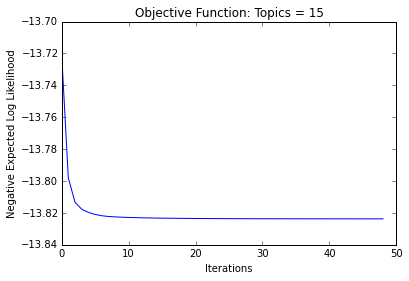

In [38]:
plt.plot(range(R-1),loglik[1:,])
plt.xlabel("Iterations")
plt.ylabel("Negative Expected Log Likelihood")
plt.title("Objective Function: Topics = %d" %num_topics)
plt.show()

## Initialization

In [4]:
text_data.shape

(5224951, 3)

In [5]:
text_data

array([[    1,  4720,     1],
       [    1,  9775,     4],
       [    1, 19996,     1],
       ..., 
       [72406, 12843,     1],
       [72406, 10666,     1],
       [72406, 19430,     1]])

In [6]:
text_data = text_data.astype('int')

In [7]:
doc_id = text_data[:,0]
word_id = text_data[:,1]
count = text_data[:,2]

In [8]:
D = max(doc_id)+1
V = max(word_id)+1

In [9]:
print D, V

72407 30784


In [10]:
K = 10

In [11]:
Beta = np.empty((K,V))
for k in range(K):
    Beta[k] = np.random.dirichlet(np.ones(V))

In [12]:
print Beta.shape
Beta

(10, 30784)


array([[  1.92140216e-05,   5.34327727e-06,   1.17955096e-05, ...,
          1.12885260e-05,   2.10782758e-06,   3.66575607e-05],
       [  8.41272928e-06,   4.07034509e-07,   8.23606841e-05, ...,
          4.89395399e-06,   4.23786843e-06,   1.88856872e-05],
       [  4.58632270e-06,   6.01463900e-06,   1.15802004e-04, ...,
          2.69356981e-05,   4.49160228e-05,   3.12733544e-05],
       ..., 
       [  2.04506299e-05,   3.41690097e-05,   8.17709568e-05, ...,
          4.37675646e-05,   9.61008974e-05,   7.43562551e-06],
       [  1.20413627e-05,   1.02292653e-05,   4.25801926e-05, ...,
          4.34030053e-05,   5.95167513e-06,   2.33640624e-05],
       [  1.33840350e-05,   1.52611415e-06,   5.27281068e-06, ...,
          2.73451824e-06,   4.18293553e-05,   3.59363537e-05]])

In [13]:
K = 10

In [14]:
Theta = np.random.dirichlet(np.ones(K))

In [15]:
Theta

array([ 0.04185428,  0.08168162,  0.23691707,  0.02268257,  0.0108687 ,
        0.01853657,  0.11340429,  0.05839565,  0.11569916,  0.29996009])

In [16]:
Theta.shape

(10,)

In [17]:
%%time
W = coo_matrix((count,(doc_id, word_id)), shape=(D, V)).tocsr()

CPU times: user 367 ms, sys: 50.3 ms, total: 418 ms
Wall time: 418 ms


In [18]:
W.shape

(72407, 30784)

## E Step

In [19]:
log_numerator = np.log(Theta.T) + W.dot(np.log(Beta.T))
log_denominator = logsumexp(log_numerator, axis=1).reshape((-1,1))
Gamma = np.exp(np.subtract(log_numerator, log_denominator)) 

In [20]:
Gamma

array([[  4.18542791e-02,   8.16816195e-02,   2.36917075e-01, ...,
          5.83956456e-02,   1.15699160e-01,   2.99960091e-01],
       [  4.91571436e-19,   7.72654095e-12,   2.88923818e-13, ...,
          2.60343567e-19,   1.59966128e-12,   9.99999860e-01],
       [  4.85290065e-19,   4.05266773e-12,   9.71816953e-18, ...,
          1.07144721e-21,   4.57820268e-20,   5.23996256e-26],
       ..., 
       [  6.68123249e-36,   3.74534431e-26,   1.00000000e+00, ...,
          5.87877624e-20,   5.03111867e-43,   4.83366332e-47],
       [  1.18908680e-23,   2.17900697e-05,   1.68124250e-11, ...,
          4.24675477e-04,   9.98907462e-01,   8.44134580e-17],
       [  2.28020292e-21,   9.99323333e-01,   8.04159037e-20, ...,
          1.23027288e-27,   1.15449546e-18,   1.23403479e-37]])

In [21]:
Zd = np.argmax(Gamma, axis=1)

In [22]:
Zd

array([9, 9, 3, ..., 2, 8, 1])

In [23]:
Z1hot = np.empty((D,K))
for d in xrange(D):
    Z1hot[d,Zd[d]] = 1

In [24]:
Z1hot

array([[  -3.17356124,   -2.50492628,   -1.44004509, ...,   -2.84051395,
          -2.1567619 ,    1.        ],
       [ -42.15667968,  -25.58635984,  -28.87261335, ...,  -42.79228478,
         -27.16122921,    1.        ],
       [ -42.16954017,  -26.23164575,  -39.17253439, ...,  -48.28527669,
         -44.53039537,  -58.21089806],
       ..., 
       [ -80.99376087,  -58.54669887,    1.        , ...,  -44.28035324,
         -97.39551664, -106.64589474],
       [ -52.78627152,  -10.73405621,  -24.80890292, ...,   -7.76418526,
           1.        ,  -37.01080483],
       [ -47.53002251,    1.        ,  -43.96707499, ...,  -61.96256151,
         -41.30286826,  -84.98535932]])

## M Step

In [25]:
# theta_hat
Theta = (np.sum(Gamma, axis=0)/D).T

# beta_hat
N_d = W.sum(axis=1)

numerator = W.transpose().dot(Gamma)
denominator = np.dot(N_d.T, Gamma)
Beta = (numerator/denominator).T

In [26]:
Theta.shape

(10,)

In [27]:
Beta

matrix([[  0.00000000e+00,   1.30940066e-05,   5.44278030e-07, ...,
           3.85986088e-18,   3.69224644e-06,   1.31212293e-05],
        [  0.00000000e+00,   1.07849687e-06,   1.29069582e-06, ...,
           3.12381201e-17,   1.02623485e-14,   8.13969813e-15],
        [  0.00000000e+00,   1.52074808e-05,   1.78058455e-06, ...,
           3.59886792e-09,   6.64236619e-08,   8.67743804e-07],
        ..., 
        [  0.00000000e+00,   9.98446765e-06,   3.80850074e-22, ...,
           4.45170046e-18,   7.64921747e-09,   1.98178057e-06],
        [  0.00000000e+00,   1.90727240e-05,   3.44980366e-11, ...,
           2.15807507e-15,   6.19653847e-06,   1.68006250e-06],
        [  0.00000000e+00,   3.06963415e-06,   2.19162832e-15, ...,
           1.61981287e-09,   4.58175479e-06,   5.84070678e-06]])

## Objective function

In [28]:
%%time
inner = np.log(Theta.T) + W.dot(np.log(Beta.T))
loglik = logsumexp(np.multiply(Gamma, inner))

CPU times: user 123 ms, sys: 19.8 ms, total: 142 ms
Wall time: 143 ms


/Users/Luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [29]:
loglik

-57052515.461717471